In [29]:
# Imports necesarios
import numpy as np
import pandas as pd
import nltk
import re
import csv
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn . naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
#import warnings
#warnings.filterwarnings("ignore")
nltk.download('punkt')
import os

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\light\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [30]:
# Se carga la información del archivo .csv con la función read_csv de pandas
emails = pd.read_csv("emails.csv")

In [31]:
# Para visualizar las primeras 10 filas del archivo se utiliza la función head
emails.head(10)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
5,Email 6,4,5,1,4,2,3,45,1,0,...,0,0,0,0,0,0,0,0,0,1
6,Email 7,5,3,1,3,2,1,37,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Email 8,0,2,2,3,1,2,21,6,0,...,0,0,0,0,0,0,0,1,0,1
8,Email 9,2,2,3,0,0,1,18,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Email 10,4,4,35,0,1,0,49,1,16,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# Con la función info() se puede visualizar información relevante del dataset
emails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [33]:
# Para 'limpiar' el dataset, es necesario eliminar la primer columna ya que solo es un indicativo
emails = emails.iloc[:, 1:] # iloc aquí es usado para extraer las columnas usando sus índices

In [34]:
# En este caso, con iloc obtenemos las siguientes 3000 columnas (sin contar la última)
x_axis = emails.iloc[:, :3000].values
x_axis

array([[ 0,  0,  1, ...,  0,  0,  0],
       [ 8, 13, 24, ...,  0,  1,  0],
       [ 0,  0,  1, ...,  0,  0,  0],
       ...,
       [ 0,  0,  1, ...,  0,  0,  0],
       [ 2,  7,  1, ...,  0,  1,  0],
       [22, 24,  5, ...,  0,  0,  0]], dtype=int64)

In [35]:
# Por último, utilizando un índice negativo, obtenemos la ultima columna
y_axis = emails.iloc[:, -1].values
y_axis

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [36]:
# Utilizando la función train_test_split obtenemos los conjuntos con los que se entrenará el modelo
# --> x_train y y_train representan los elementos que se usarán para el entrenamiento
# --> x_text y y_test representan los elementos que se usarán para probar la precisión del modelo entrenado
# NOTA: El valor 0.3 representa la proporción del dataset que se usará para hacer las pruebas
x_train, x_test, y_train, y_test = train_test_split(x_axis, y_axis, test_size = 0.3, random_state = 1)

In [53]:
# Utilizando la clase de Naive Bayes incluida en sklearn se realiza el entrenamiento con los conjuntos que ya tenemos
naive_bayes = MultinomialNB()
naive_bayes.fit(x_train, y_train)
y_predicted = naive_bayes.predict(x_test) # y_predicted es el conjunto de valores correspondientes a las clases SPAM y NO SPAM

In [54]:
# Medimos el desempeño de la clasificación
# tp = true positive, fp = false positive, fn = false negative
print("Precision : ", precision_score(y_test, y_predicted)) # tp/(tp+fp)
print("Recall : ", recall_score(y_test, y_predicted)) # tp/(tp+fn)
print("Accuracy Score : ", accuracy_score(y_test, y_predicted)) # t = correctly_predicted / len(y_predicted)
print("F1 Score : ", f1_score(y_test, y_predicted)) # 2 * (precision * recall) / (precision + recall)

Precision :  0.8732394366197183
Recall :  0.9559471365638766
Accuracy Score :  0.946520618556701
F1 Score :  0.9127234490010515


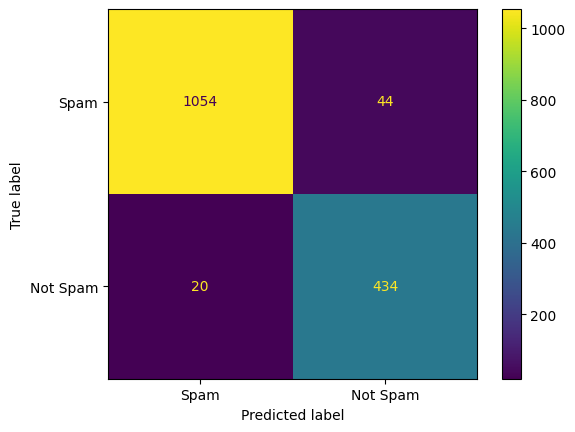

In [50]:
# Por último, utilizando la matriz de confusión se contrastan los resultados obtenidos
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_predicted), display_labels=['Spam', 'Not Spam'] )
cm_display.plot()
plt.show()

In [40]:
# Para probar el modelo entrenado, se creo una funcion la cual toma una cadena y le da el formato necesario para utilizarla con el modelo
def predict(example_mail):
    example_mail = example_mail.lower()
    example_mail = re.sub(r"http\S+", "", example_mail)
    example_mail = re.sub("[^a-zA-Z0-9]"," ", example_mail)
    example_mail = nltk.word_tokenize(example_mail)
    columns_names = []
    with open('emails.csv') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter = ',')
        for row in csv_reader:
            columns_names.append(row)
            break
    columns_names[0].pop(0)
    columns_names[0].pop(len(columns_names[0])-1)
    dict_words = {}
    for word in columns_names[0]:
        dict_words[word] = 0
    keys = list(dict_words.keys())
    for word in example_mail:
        if(word in keys):
            dict_words[word] += 1
    count_words = np.asarray(list(dict_words.values()))
    return naive_bayes.predict([count_words])

In [46]:
example = predict("You may be wondering why your antivirus cannot detect my malicious software")

In [47]:
example[0]

1

### Ejercicio
Utilizado el mismo dataset que el ejemplo anterior:

1. ¿Qué otros algoritmos clasificadores podrías utilizar?

- Regresión logística: Este es un algoritmo de clasificación que se utiliza para predecir la probabilidad de una variable categórica dependiente. En la regresión logística, la variable dependiente es una variable binaria que contiene datos codificados como 1 (sí, éxito, etc.) o 0 (no, fracaso, etc.). En otras palabras, el modelo de regresión logística predice P(Y=1) en función de X.
- Máquinas de vectores de soporte (SVM): Este es un algoritmo de clasificación que busca encontrar un hiperplano en un espacio N-dimensional (N - el número de características) que clasifica claramente los puntos de datos.
- Árboles de decisión: Este es un tipo de algoritmo de aprendizaje supervisado que se utiliza principalmente para problemas de clasificación. Funciona tanto para variables categóricas como continuas de entrada y salida.
- Bosques aleatorios: Este es un tipo de algoritmo de aprendizaje por conjuntos que se utiliza para problemas de clasificación y regresión. Un bosque aleatorio es una colección de árboles de decisión.
2. Utiliza Multinomial Naive Bayes para clasificar el dataset
3. Para el punto anterior, utiliza la matriz de confusión para explicar el desepeño del modelo

Analizando el asificador de spam,  los cuadrantes de la matriz representan lo siguiente:

Precision :  0.8732394366197183

Recall :  0.9559471365638766

Accuracy Score :  0.946520618556701

F1 Score :  0.9127234490010515

Verdaderos positivos (1035): Esta es la cantidad de correos electrónicos que fueron correctamente identificados como spam.
Falsos positivos (63): Esta es la cantidad de correos electrónicos que fueron incorrectamente identificados como spam (es decir, no eran spam, pero el clasificador los marcó como tal).
Falsos negativos (20): Esta es la cantidad de correos electrónicos que fueron incorrectamente identificados como no spam (es decir, eran spam, pero el clasificador no los marcó como tal).
Verdaderos negativos (434): Esta es la cantidad de correos electrónicos que fueron correctamente identificados como no spam.

Esas cuatro medidas  dan una idea completa del rendimiento del clasificador. En general, se  desea  maximizar los verdaderos positivos y verdaderos negativos (las predicciones correctas) y minimizar los falsos positivos y falsos negativos (las predicciones incorrectas).

Parece ser que el  modelo tiene un buen rendimiento, ya que la mayoría de los correos electrónicos se clasificaron correctamente. Sin embargo, hay algunos correos electrónicos que se clasificaron incorrectamente. 


Otras cosas a  notar es que a diferencia de la clasificacion con GaussianNB se tieen una presicion menor 0.87 < 0.90, al igual que Accuracy  score 0.94<0.95, F1  0.91<0.93, mientras que en recall se obtiene valores iguales.

Dado lo anterior con Multinomial Naive Bayes la cantidad de correos correctamente identificados como spam  (1035) es menor que los indentificados correctamente con GaussianNB (1054),   para los que fueron incorrectamente identificados como spam 
MultinomialNB tiene un numero mayor (63) que con GaussianNB (44), mientras que para falsos negativos y verdaderos negativos se mantiene igual para ambas clasificaciones.

De modo que la clasificacion con MultinomialNB aunque tiene un buen rendimiento, su rendimiento es menor comparado con el clasificador GaussianNB 


Con GussianNB se tiene:

Precision :  0.9079497907949791

Recall :  0.9559471365638766

Accuracy Score :  0.9587628865979382

F1 Score :  0.9313304721030043


La matriz de confusión proporciona la siguiente información:
Verdaderos positivos (1054): Esta es la cantidad de correos electrónicos que fueron correctamente identificados como spam.
Falsos positivos (44): Esta es la cantidad de correos electrónicos que fueron incorrectamente identificados como spam (es decir, no eran spam, pero el clasificador los marcó como tal).
Falsos negativos (20): Esta es la cantidad de correos electrónicos que fueron incorrectamente identificados como no spam (es decir, eran spam, pero el clasificador no los marcó como tal).
Verdaderos negativos (434): Esta es la cantidad de correos electrónicos que fueron correctamente identificados como no spam.

